# Scikit-learnでTrain.pyを作ろう

## ライブラリをインポートしよう

In [ ]:
# Numpy, pandasをインポート
import numpy as np
import pandas as pd

# データを開く
data_file = pd.read_csv('CreditData.csv', header=0,encoding="UTF-8")

data_file.head()

,貯金,信用履歴,年齢,家族構成,仕事,審査結果
0,5000000,クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,22,配偶者あり,パート,発行可
1,100000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行可
2,4000000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行不可
3,4000000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,管理者/役員,発行不可
4,500000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,パート,発行不可


In [ ]:
data_file.describe()

,貯金,年齢
count,1.448000e+03,1448.000000
mean,4.843025e+06,48.556630
std,4.866182e+06,13.493333
min,0.000000e+00,22.000000
25%,5.000000e+05,38.000000
50%,4.000000e+06,50.000000
75%,8.000000e+06,60.000000
max,2.000000e+07,70.000000


## 正規化・標準化しよう

In [ ]:
# 正規化
data_file["貯金"] = (data_file["貯金"]-data_file["貯金"].min()) / (data_file["貯金"].max()-data_file["貯金"].min())

data_file.head()

,貯金,信用履歴,年齢,家族構成,仕事,審査結果
0,0.250,クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,22,配偶者あり,パート,発行可
1,0.005,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行可
2,0.200,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行不可
3,0.200,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,管理者/役員,発行不可
4,0.025,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,パート,発行不可


## グループ分けしよう

In [ ]:
# グループ分け
age_bins =[20,30,40,50,60,100]
age_label =['A20','A30','A40','A50','A60']
data_file['年齢'] = pd.cut(data_file['年齢'], bins=age_bins, labels=age_label)

data_file.head()

,貯金,信用履歴,年齢,家族構成,仕事,審査結果
0,0.250,クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,A20,配偶者あり,パート,発行可
1,0.005,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,社員,発行可
2,0.200,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,社員,発行不可
3,0.200,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,管理者/役員,発行不可
4,0.025,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,パート,発行不可


## One-hot-encodingしよう

In [ ]:
# One hot encoding
data_file = pd.get_dummies(data_file)

data_file.head()

,貯金,信用履歴_この銀行のクレジットローンは全て完済,信用履歴_クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,信用履歴_ローンの残があるが現状遅延なく支払われている,信用履歴_危険人物 / 他のクレジットローンが存在している (この銀行以外で),信用履歴_過去に遅延あり,年齢_A20,年齢_A30,年齢_A40,年齢_A50,年齢_A60,家族構成_配偶者あり,家族構成_配偶者なし,仕事_パート,仕事_無職,仕事_社員,仕事_管理者/役員,審査結果_発行不可,審査結果_発行可
0,0.250,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,0.005,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,0.200,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,0.200,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
4,0.025,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0


## Numpyでデータを分けよう

In [ ]:
# Numpy配列に変更
data_file = np.array(data_file)

# 入力データと正解ラベルに分割
data = data_file[:,:17]
label = data_file[:,17]

# サンプル数を計測
len(data)

data[2]

array([0.2, 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 1. , 0. ])

## Scikit-learnで学習データとテストデータに分けよう


In [ ]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(data,label, 
                                                                  random_state = 0, 
                                                                  stratify = label, 
                                                                  test_size = 0.3)


## Scikit-learnでSVMをインポートしよう

In [ ]:
# Scikit-learnのSVMをインポート
from sklearn import svm

# SVMの読み込み
clf = svm.SVC(gamma=0.001, C=100.)

## クロスバリデーション

In [14]:
from sklearn.model_selection import cross_val_score

# 交差検証しない場合：training set を用いて学習 
)
model = clf.fit(train_data, train_label)

# 交差検証しない場合：test set を用いて評価
score = model.score(test_data, test_label)
print('Test set score: {}'.format(score))

# 交差検証を用いた学習
scores = cross_val_score(clf, train_data, train_label,cv=5)

# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

Test set score: 0.8827586206896552
Cross-Validation scores: [0.8817734  0.86699507 0.83743842 0.86138614 0.8960396 ]
Average score: 0.8687265278251963


## テストデータで検証しよう

In [ ]:
from sklearn import metrics

y_pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(test_label, y_pre)
print('正解率{0:.1f}%'.format(ac_score * 100)) # :.1f 小数点桁数1桁

正解率88.3%


## 混同行列を確認しよう

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(test_label, y_pre))
print(confusion_matrix(test_label, y_pre))

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       210
         1.0       0.86      0.92      0.89       225

    accuracy                           0.88       435
   macro avg       0.89      0.88      0.88       435
weighted avg       0.88      0.88      0.88       435

[[176  34]
 [ 17 208]]


## ROCカーブとAUCスコアを確認しよう


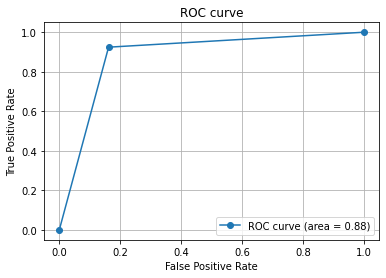

In [ ]:
import matplotlib.pyplot as plt

# FPR, TPR, 閾値 を算出
fpr, tpr, thresholds = metrics.roc_curve(test_label, y_pre)

# AUCスコア
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, marker='o',label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
import pickle

# モデルを保存する
filename = "/content/drive/My Drive/Colab Notebooks/final_model.sav"
pickle.dump(clf, open(filename, 'wb'))

FileNotFoundError: ignored